# Fashion MNIST
* In this notebook, I work on Fashion MNIST dataset, which contains grayscale images of 10 different types of clothing items.


## Importing libraries and Data Overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")


In [3]:
print(f"Train Veri boyutu:{train_df.shape}")
train_df.head()

Train Veri boyutu:(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(f"Test Veri boyutu:{test_df.shape}")
test_df.head()

Test Veri boyutu:(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(f"train df eksik veri sayisi: {train_df.isnull().sum().sum()}")

train df eksik veri sayisi: 0


In [6]:
test_df.isnull().sum().sum()

0

In [7]:
train_df["label"].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [8]:
test_df["label"].value_counts()

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64

In [9]:
X_data= train_df.drop(["label"],axis=1)
Y_data= train_df["label"]

print(f" X data shape : {X_data.shape}")
print(f" Y data shape: {Y_data.shape}")

 X data shape : (60000, 784)
 Y data shape: (60000,)


In [10]:
X_test= test_df.drop(["label"],axis=1)
Y_test= test_df["label"]

print(f" X data shape : {X_test.shape}")
print(f" Y data shape: {Y_test.shape}")

 X data shape : (10000, 784)
 Y data shape: (10000,)


In [11]:
img_size=int(np.sqrt(X_data.shape[1])) # kök 784 
img_size

28

## Veri görselleştirme

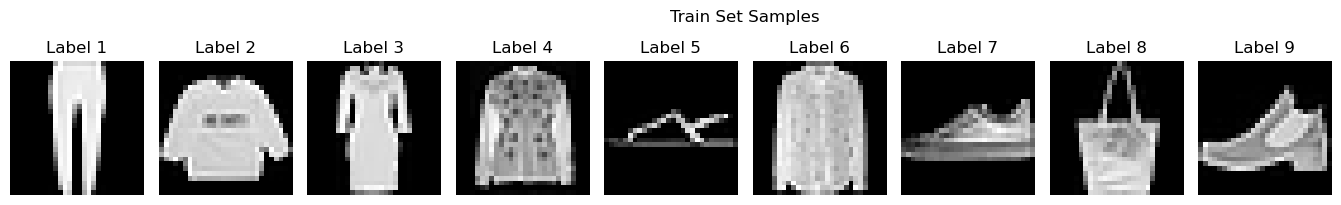

In [12]:
plt.figure(figsize=(15, 4))
for label in range(1, 10):
    img=X_data[Y_data == label].iloc[0].values
    img=img.reshape((img_size, img_size))
    plt.subplot(2, 10, label)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label {label}")
    plt.axis("off")
plt.suptitle("Train Set Samples")
plt.tight_layout()
plt.show()


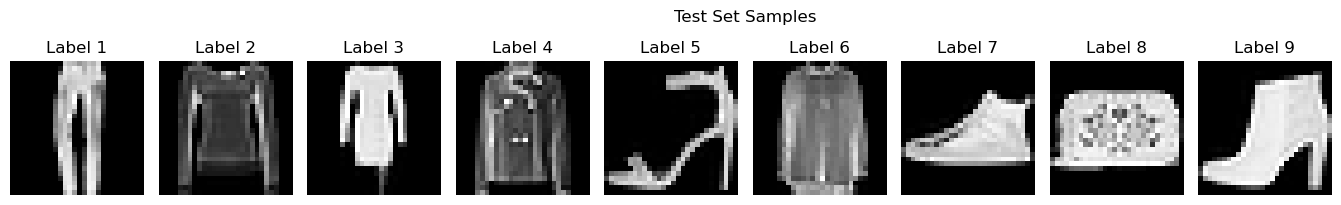

In [13]:
plt.figure(figsize=(15,4))
for label in range(1,10):
    img_t= X_test[Y_test==label].iloc[0].values
    img_t= img_t.reshape((img_size,img_size))
    plt.subplot(2, 10, label)
    plt.imshow(img_t, cmap="gray")
    plt.title(f"Label {label}")
    plt.axis("off")
plt.suptitle("Test Set Samples")
plt.tight_layout()
plt.show()

## Data Preporcessing

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_data,Y_data, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

In [15]:
X_train= X_train/255.0
X_val= X_val/255.0 
X_test= X_test/255.0

In [16]:
Y_train= to_categorical(Y_train, num_classes=10)
Y_val= to_categorical(Y_val, num_classes=10)
Y_test= to_categorical(Y_test, num_classes=10)

print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)
print("Y_test shape:", Y_test.shape)

Y_train shape: (48000, 10)
Y_val shape: (12000, 10)
Y_test shape: (10000, 10)


## 2 Layer Neural Network
* In this part, a simple 2-layer fully connected neural network (ANN) model is built and trained. The model consists of one hidden layer with 128 neurons using the ReLU activation function, and one output layer using the Softmax activation function.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_2L= Sequential() #model
model_2L.add(Dense(units=128, activation="relu", input_dim=X_train.shape[1])) #first layer
model_2L.add(Dense(units=10, activation="softmax")) #output layer
model_2L.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_2L=model_2L.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=30, batch_size=32)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5192 - accuracy: 0.8188 - val_loss: 0.4119 - val_accuracy: 0.8558
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3881 - accuracy: 0.8630 - val_loss: 0.3829 - val_accuracy: 0.8565
Epoch 3/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3523 - accuracy: 0.8742 - val_loss: 0.3467 - val_accuracy: 0.8760
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3267 - accuracy: 0.8815 - val_loss: 0.3393 - val_accuracy: 0.8752
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3083 - accuracy: 0.8868 - val_loss: 0.3547 - val_accuracy: 0.8698
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2918 - accuracy: 0.8938 - val_loss: 0.3216 - val_accuracy: 0.8856
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2773 - accuracy: 0.8973 - val_loss: 0.3389 - val_accuracy:

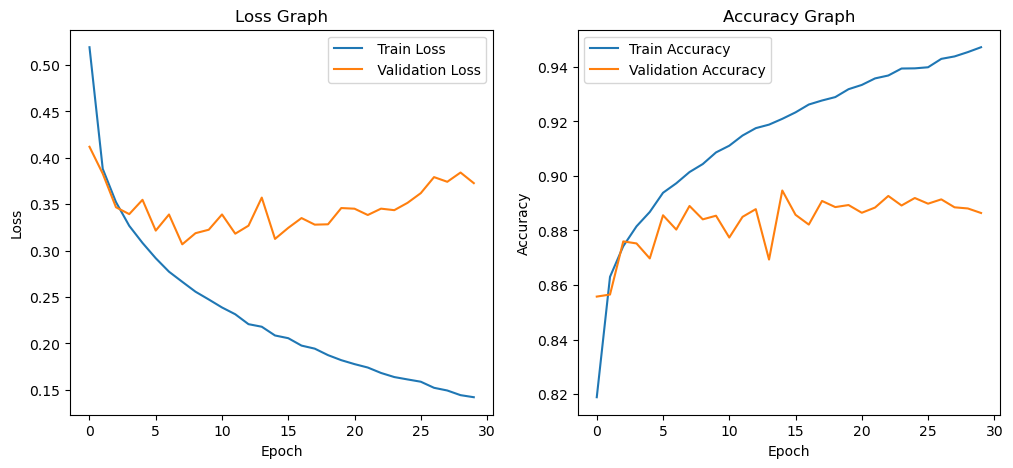

In [18]:
plt.figure(figsize=(12,5))

#loss function
plt.subplot(1,2,1)
plt.plot(history_2L.history["loss"], label=" Train Loss")
plt.plot(history_2L.history["val_loss"], label=" Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Graph")
plt.legend()

#accuracy graph
plt.subplot(1,2,2)
plt.plot(history_2L.history["accuracy"],label="Train Accuracy")
plt.plot(history_2L.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")
plt.legend()

plt.show()

In [19]:
test_loss_2L, test_acc_2L = model_2L.evaluate(X_test,Y_test)
print(f"Test Accuracy: {test_acc_2L:.4f}")
print(f"Test Loss: {test_loss_2L:.4f}")


313/313 [==============================] - 1s 1ms/step - loss: 0.3785 - accuracy: 0.8861
Test Accuracy: 0.8861
Test Loss: 0.3785


313/313 [==============================] - 1s 1ms/step


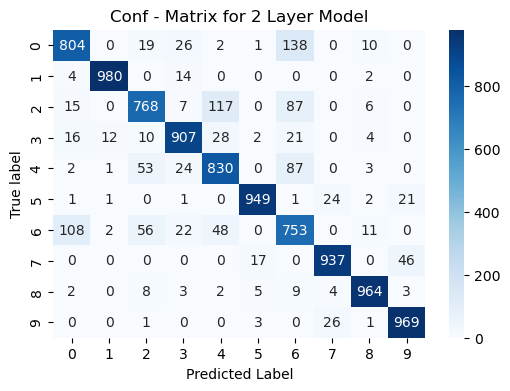

In [20]:
y_pred_test_2L = model_2L.predict(X_test)
y_pred_labels_2L = np.argmax(y_pred_test_2L, axis=1) 
y_true_labels_2L=np.argmax(Y_test,axis=1)

#confusion matrix
cm_2L= confusion_matrix(y_true_labels_2L,y_pred_labels_2L)

plt.figure(figsize=(6,4))
sns.heatmap(cm_2L, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True label")
plt.title("Conf - Matrix for 2 Layer Model")
plt.show()


* Training: Train loss steadily decreased (94.7% accuracy), but validation accuracy stuck at 88.6%.
*  138 errors between classes 0 - 6 , revealing the model's failure to capture visual features (e.g, edges) due to its shallow architecture.
* Overfitting: %6.1 gap between train/val accuracy indicates overfitting.

## L Layer Neural Network
* In this section, I build a deeper neural network (L-layer NN) with multiple hidden layers to improve the model's learning capacity and performance compared to the simpler 2-layer model.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_LL= Sequential()
model_LL.add(Dense(units=256, activation="relu", input_dim=X_train.shape[1])) #input layer
model_LL.add(Dense(units=128, activation="relu")) # first hidden layer
model_LL.add(Dense(units=64, activation="relu")) # second hidden layer
model_LL.add(Dense(units=10, activation="softmax")) # output layer

model_LL.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])
history_LL=model_LL.fit(X_train,Y_train, validation_data=(X_val,Y_val),epochs=30, batch_size=32)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5103 - accuracy: 0.8163 - val_loss: 0.4006 - val_accuracy: 0.8516
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3784 - accuracy: 0.8632 - val_loss: 0.3511 - val_accuracy: 0.8728
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3436 - accuracy: 0.8730 - val_loss: 0.3283 - val_accuracy: 0.8789
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3182 - accuracy: 0.8829 - val_loss: 0.3729 - val_accuracy: 0.8610
Epoch 5/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2976 - accuracy: 0.8894 - val_loss: 0.3466 - val_accuracy: 0.8752
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2838 - accuracy: 0.8949 - val_loss: 0.3545 - val_accuracy: 0.8748
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2680 - accuracy: 0.8996 - val_loss: 0.3619 - val_accuracy:

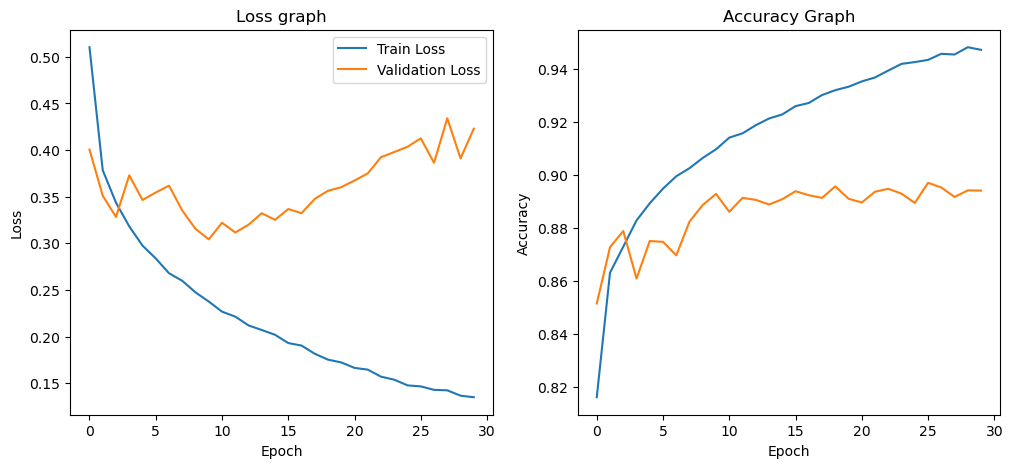

In [22]:
plt.figure(figsize=(12,5))

#loss function
plt.subplot(1,2,1)
plt.plot(history_LL.history["loss"],label="Train Loss")
plt.plot(history_LL.history["val_loss"],label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss graph")
plt.legend()

#accuracy graph
plt.subplot(1,2,2)
plt.plot(history_LL.history["accuracy"],label="Train Accuracy")
plt.plot(history_LL.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")

plt.show()

In [23]:
test_loss_LL, test_acc_LL= model_LL.evaluate(X_test, Y_test)

print(f" Test Accuracy for LL Model: {test_acc_LL:.4f}")
print(f" Test Loss for LL Model: {test_loss_LL:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8958
 Test Accuracy for LL Model: 0.8958
 Test Loss for LL Model: 0.4116


313/313 [==============================] - 1s 2ms/step


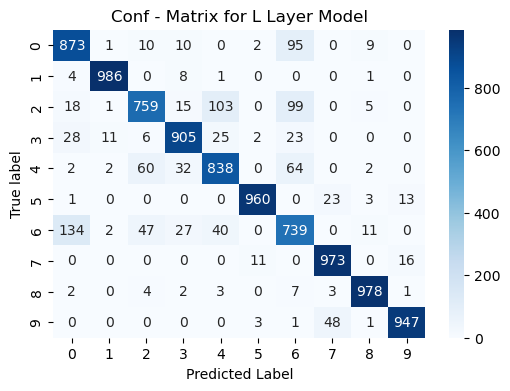

In [24]:
y_pred_test_LL=model_LL.predict(X_test)
y_pred_labels_LL=np.argmax(y_pred_test_LL, axis=1)
y_true_labels_LL=np.argmax(Y_test,axis=1)

#conf matrix
cm_LL=confusion_matrix(y_true_labels_LL, y_pred_labels_LL)

plt.figure(figsize=(6,4))
sns.heatmap(cm_LL, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True label")
plt.title("Conf - Matrix for L Layer Model")
plt.show()


* Despite more layers, test accuracy only improved by +0.9% (89.5%)

# Convolutional Neural Network (CNN)

* ANN expects (num_samples, num_features) -> (48000, 784)
* CNN expect (num_samples, width, height, channels) -> (48000, 28, 28, 1)
* now I'm gonna re-shape  data before using CNN

In [25]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_val = X_val.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)


print(f" X Train Shape : {X_train.shape}")
print(f" X Validation Shape : {X_val.shape}")
print(f" X Test Shape : {X_test.shape}")

 X Train Shape : (48000, 28, 28, 1)
 X Validation Shape : (12000, 28, 28, 1)
 X Test Shape : (10000, 28, 28, 1)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_CNN= Sequential()

# 1 Convolution + Pooling
model_CNN.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(28,28,1)))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

# 2 Convolution + Pooling
model_CNN.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_CNN.add(MaxPooling2D(pool_size=(2,2)))
model_CNN.add(Dropout(0.25))

model_CNN.add(Flatten()) #flatten
model_CNN.add(Dense(units=128, activation="relu")) #fully connected 
model_CNN.add(Dropout(0.25))

model_CNN.add(Dense(units=10, activation="softmax")) #outputlayer

model_CNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history_CNN= model_CNN.fit(X_train, Y_train, validation_data=(X_val,Y_val), epochs=30, batch_size=32)


Epoch 1/30
1500/1500 [==============================] - 22s 14ms/step - loss: 0.5137 - accuracy: 0.8121 - val_loss: 0.3349 - val_accuracy: 0.8784
Epoch 2/30
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3518 - accuracy: 0.8733 - val_loss: 0.3105 - val_accuracy: 0.8857
Epoch 3/30
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3048 - accuracy: 0.8889 - val_loss: 0.2800 - val_accuracy: 0.8992
Epoch 4/30
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2755 - accuracy: 0.9006 - val_loss: 0.2512 - val_accuracy: 0.9068
Epoch 5/30
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2559 - accuracy: 0.9052 - val_loss: 0.2362 - val_accuracy: 0.9137
Epoch 6/30
1500/1500 [==============================] - 22s 14ms/step - loss: 0.2412 - accuracy: 0.9105 - val_loss: 0.2345 - val_accuracy: 0.9131
Epoch 7/30
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2282 - accuracy: 0.9148 - val_loss: 0.2239 -

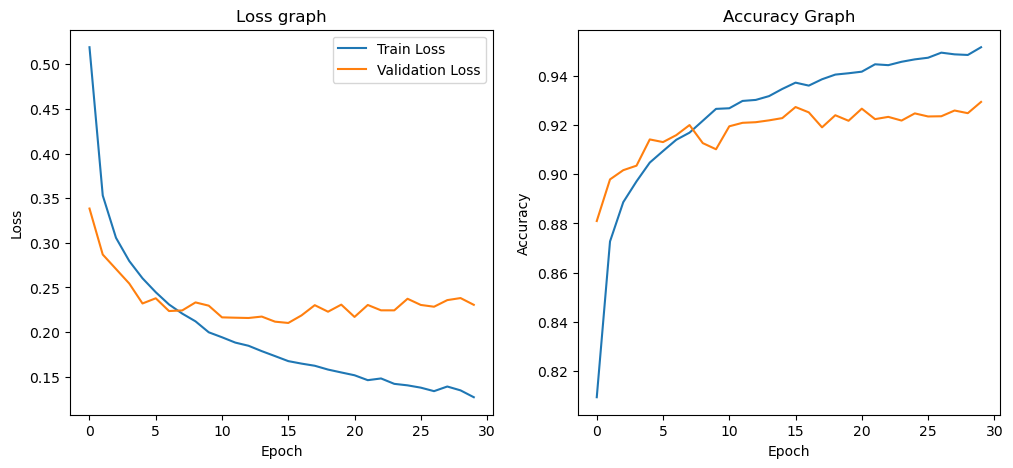

In [27]:
plt.figure(figsize=(12,5))

#loss function
plt.subplot(1,2,1)
plt.plot(history_CNN.history["loss"],label="Train Loss")
plt.plot(history_CNN.history["val_loss"],label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss graph")
plt.legend()

#accuracy graph
plt.subplot(1,2,2)
plt.plot(history_CNN.history["accuracy"],label="Train Accuracy")
plt.plot(history_CNN.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")

plt.show()

In [28]:
test_loss_CNN, test_acc_CNN= model_CNN.evaluate(X_test,Y_test)

print(f"Test Accuracy for CNN Model: {test_acc_CNN:.4f}")
print(f"Test Loss for CNN Model: {test_loss_CNN:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.2126 - accuracy: 0.9324
Test Accuracy for CNN Model: 0.9324
Test Loss for CNN Model: 0.2126


313/313 [==============================] - 1s 3ms/step


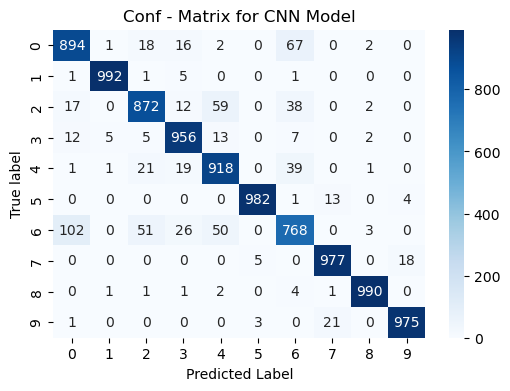

In [29]:
y_pred_test_CNN = model_CNN.predict(X_test)
y_pred_labels_CNN = np.argmax(y_pred_test_CNN, axis=1)
y_true_labels_CNN = np.argmax(Y_test, axis=1)

#conf matrix
cm_CNN= confusion_matrix(y_true_labels_CNN, y_pred_labels_CNN)

plt.figure(figsize=(6,4))
sns.heatmap(cm_CNN, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True label")
plt.title("Conf - Matrix for CNN Model")
plt.show()


* During model training, both train and validation losses decrease in a balanced manner.
* Training accuracy reaches around 95%, and the test accuracy is approximately 93%.
* The model is highly successful at distinguishing between classes. The confusion matrix looks very balanced overall.

## Improved CNN Model : Data Augmentation + Optimizer

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


model_CNN2= Sequential()

# 1 Convolution + Pooling
model_CNN2.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(28,28,1)))
model_CNN2.add(MaxPooling2D(pool_size=(2,2)))
model_CNN2.add(Dropout(0.25))

# 2 Convolution + Pooling
model_CNN2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_CNN2.add(MaxPooling2D(pool_size=(2,2)))
model_CNN2.add(Dropout(0.25))

model_CNN2.add(Flatten()) #flatten
model_CNN2.add(Dense(units=128, activation="relu")) #fully connected 
model_CNN2.add(Dropout(0.25))

model_CNN2.add(Dense(units=10, activation="softmax")) #outputlayer


In [31]:
optimizer = Adam(learning_rate=0.001)  #optimizer
model_CNN2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(X_train)

In [33]:
# fitting model
history_CNN2 = model_CNN2.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=30, validation_data=(X_val, Y_val))


Epoch 1/30
1500/1500 [==============================] - 32s 21ms/step - loss: 0.7189 - accuracy: 0.7285 - val_loss: 0.4556 - val_accuracy: 0.8197
Epoch 2/30
1500/1500 [==============================] - 30s 20ms/step - loss: 0.5410 - accuracy: 0.7939 - val_loss: 0.3734 - val_accuracy: 0.8593
Epoch 3/30
1500/1500 [==============================] - 30s 20ms/step - loss: 0.4872 - accuracy: 0.8155 - val_loss: 0.3508 - val_accuracy: 0.8658
Epoch 4/30
1500/1500 [==============================] - 30s 20ms/step - loss: 0.4490 - accuracy: 0.8304 - val_loss: 0.3135 - val_accuracy: 0.8783
Epoch 5/30
1500/1500 [==============================] - 31s 20ms/step - loss: 0.4299 - accuracy: 0.8388 - val_loss: 0.3158 - val_accuracy: 0.8775
Epoch 6/30
1500/1500 [==============================] - 31s 21ms/step - loss: 0.4135 - accuracy: 0.8473 - val_loss: 0.3061 - val_accuracy: 0.8808
Epoch 7/30
1500/1500 [==============================] - 31s 21ms/step - loss: 0.4010 - accuracy: 0.8502 - val_loss: 0.2849 -

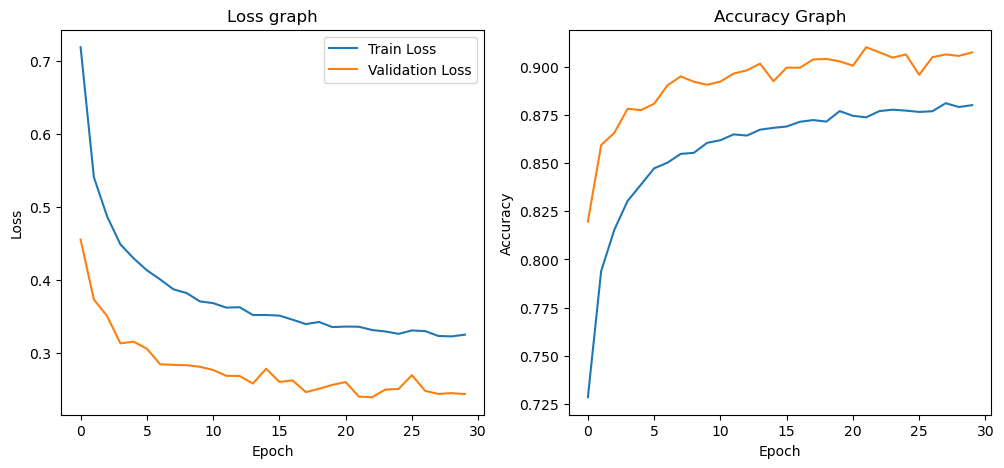

In [34]:
plt.figure(figsize=(12,5))

#loss function
plt.subplot(1,2,1)
plt.plot(history_CNN2.history["loss"],label="Train Loss")
plt.plot(history_CNN2.history["val_loss"],label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss graph")
plt.legend()

#accuracy graph
plt.subplot(1,2,2)
plt.plot(history_CNN2.history["accuracy"],label="Train Accuracy")
plt.plot(history_CNN2.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")

plt.show()

In [35]:
test_loss_CNN2, test_acc_CNN2= model_CNN2.evaluate(X_test,Y_test)

print(f"Test Accuracy for CNN2 Model: {test_acc_CNN2:.4f}")
print(f"Test Loss for CNN2 Model: {test_loss_CNN2:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2187 - accuracy: 0.9173
Test Accuracy for CNN2 Model: 0.9173
Test Loss for CNN2 Model: 0.2187


313/313 [==============================] - 1s 3ms/step


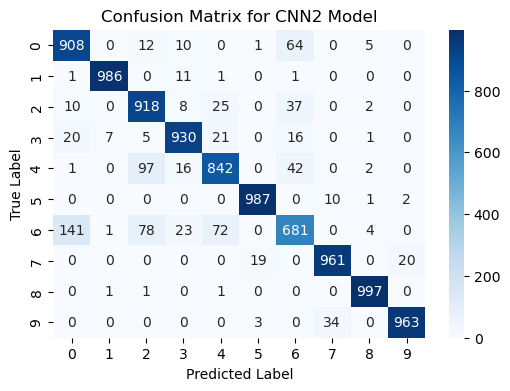

In [36]:
y_pred_test_CNN2 = model_CNN2.predict(X_test)
y_pred_labels_CNN2 = np.argmax(y_pred_test_CNN2, axis=1)
y_true_labels_CNN2 = np.argmax(Y_test, axis=1)

cm_CNN2 = confusion_matrix(y_true_labels_CNN2, y_pred_labels_CNN2)

#conf matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_CNN2, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CNN2 Model")
plt.show()

* Train Loss and Validation Loss decrease steadily over time. That's good sign that the model is learning properly.
* Train Accuracy and Validation Accuracy both keep increasing.
* Test Set Accuracy: 91.73% → It is slightly lower than the previous CNN model (93.24%), but the model is more generalized because validation and test results are more balanced.
* Looking at the Confusion Matrix, there is still some confusion between certain classes (especially class 6), but overall performance is quite good.

## Keras Tuner
* **KERAS TUNER:** used to automatically optimize hyperparameters of a model (like number of filters, neurons, learning rate, etc). Find the best settings without manually trying every possibility.
* **What did I tune in this section?** In this section, I tuned only some basic parameters. 
  - Number of filters in the first Conv2D (filters_1)
  - Number of filters in the second Conv2D (filters_2)
  - Number of neurons in the Dense Layer (dense_units)
  - Learning Rate
*  So this was just a basic trial for tuning.
*  **What else could have been tuned?** (This was just a demo a pro tuning would also include:)
  - Number of Layers, dropout rate, Activation Funcitons, Kernel Sizes, Batch Size, Optimizer etc. 

### What steps did I follow in this section?
* First, I created a build_model() function. Inside it, I used hp.Choice() to define hyperparameters with different possible values (filter numbers, dense layer units, and learning rate).
* used RandomSearch and tried 10 different combinations. (max_trials=10, executions_per_trial=1, meaning each combination was trained once).
* From these 10 combinations, I selected the best hp's based on val acc (best_hps)
* Using the hp's, I re-built a new model and trained it for 30 epochs.
* Then I evaluated the model's performance on the test set
* Finally, I plotted the conf matrix to better analyze the correct and incorrect class.

In [37]:
from kerastuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    
    # 1 Convolution + Pooling
    model.add(Conv2D(filters=hp.Choice('filters_1', values=[32, 64, 96]),
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    # 2 Convolution + Pooling
    model.add(Conv2D(filters=hp.Choice('filters_2', values=[64, 128, 256]),
        kernel_size=(3,3),
        padding='same',
        activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(
        units=hp.Choice('dense_units', values=[64, 128, 256]),
        activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [38]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy', #maximize
    max_trials=10,            # total 10 different combinations
    executions_per_trial=1,   # try each comb. once
    directory='tuner_dir',
    project_name='cnn_hyperparam_tuning'
)

Reloading Tuner from tuner_dir\cnn_hyperparam_tuning\tuner0.json


In [39]:
tuner.search(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=10,
    validation_data=(X_val, Y_val)
)

In [40]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best filters_1: {best_hps.get('filters_1')}
Best filters_2: {best_hps.get('filters_2')}
Best dense_units: {best_hps.get('dense_units')}
Best learning_rate: {best_hps.get('learning_rate')}
""")



Best filters_1: 64
Best filters_2: 256
Best dense_units: 128
Best learning_rate: 0.001



In [41]:
model_best = Sequential()


model_best.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(28,28,1)))
model_best.add(MaxPooling2D(pool_size=(2,2)))
model_best.add(Dropout(0.25))

model_best.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_best.add(MaxPooling2D(pool_size=(2,2)))
model_best.add(Dropout(0.25))


model_best.add(Flatten())
model_best.add(Dense(128, activation="relu"))
model_best.add(Dropout(0.25))

model_best.add(Dense(10, activation="softmax"))

In [42]:
optimizer = Adam(learning_rate=0.001)
model_best.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [43]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

In [44]:
history_best = model_best.fit(datagen.flow(X_train, Y_train, batch_size=32), epochs=30, validation_data=(X_val, Y_val))

Epoch 1/30
1500/1500 [==============================] - 45s 30ms/step - loss: 0.6932 - accuracy: 0.7372 - val_loss: 0.4439 - val_accuracy: 0.8217
Epoch 2/30
1500/1500 [==============================] - 47s 32ms/step - loss: 0.5141 - accuracy: 0.8056 - val_loss: 0.3540 - val_accuracy: 0.8682
Epoch 3/30
1500/1500 [==============================] - 45s 30ms/step - loss: 0.4604 - accuracy: 0.8270 - val_loss: 0.3172 - val_accuracy: 0.8799
Epoch 4/30
1500/1500 [==============================] - 45s 30ms/step - loss: 0.4231 - accuracy: 0.8419 - val_loss: 0.3082 - val_accuracy: 0.8827
Epoch 5/30
1500/1500 [==============================] - 46s 31ms/step - loss: 0.4040 - accuracy: 0.8475 - val_loss: 0.2841 - val_accuracy: 0.8930
Epoch 6/30
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3899 - accuracy: 0.8537 - val_loss: 0.2799 - val_accuracy: 0.8972
Epoch 7/30
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3753 - accuracy: 0.8603 - val_loss: 0.2764 -

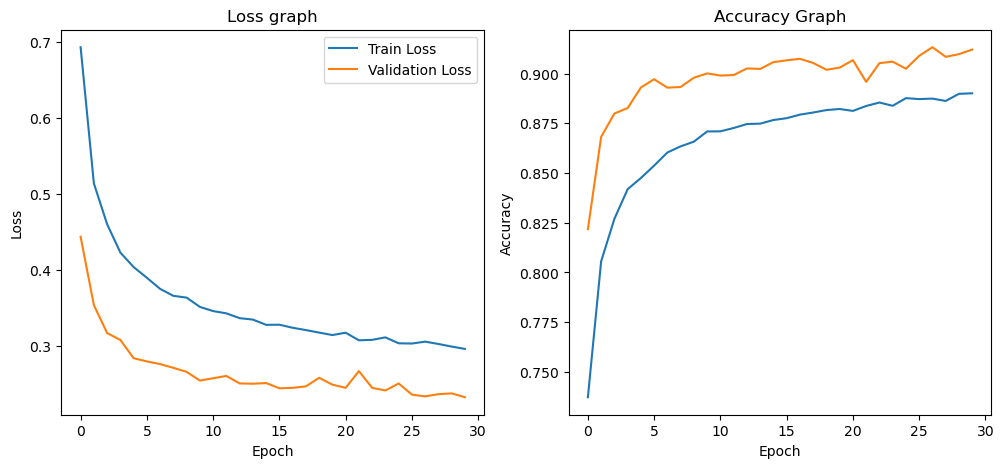

In [45]:
plt.figure(figsize=(12,5))

#loss function
plt.subplot(1,2,1)
plt.plot(history_best.history["loss"],label="Train Loss")
plt.plot(history_best.history["val_loss"],label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss graph")
plt.legend()

#accuracy graph
plt.subplot(1,2,2)
plt.plot(history_best.history["accuracy"],label="Train Accuracy")
plt.plot(history_best.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Graph")

plt.show()

In [46]:
test_loss_best, test_acc_best= model_best.evaluate(X_test,Y_test)

print(f"Test Accuracy for Tuned Model: {test_acc_best:.4f}")
print(f"Test Loss for Tuned Model: {test_loss_best:.4f}")

313/313 [==============================] - 3s 8ms/step - loss: 0.2240 - accuracy: 0.9179
Test Accuracy for Tuned Model: 0.9179
Test Loss for Tuned Model: 0.2240


313/313 [==============================] - 2s 7ms/step


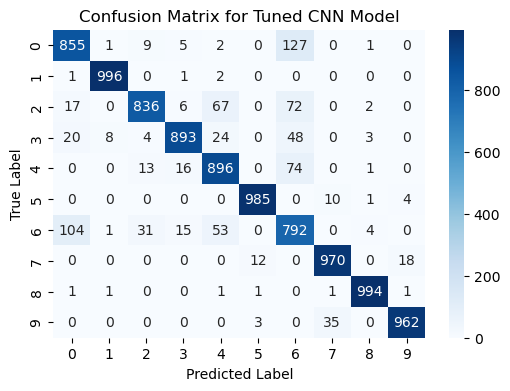

In [47]:
y_pred_best = model_best.predict(X_test)
y_pred_labels_best = np.argmax(y_pred_best, axis=1)
y_true_labels = np.argmax(Y_test, axis=1)

#conf matrix
cm_best = confusion_matrix(y_true_labels, y_pred_labels_best)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Tuned CNN Model")
plt.show()

* Train Loss decreased steadily over time, and Validation Loss also decreased with some small fluctuations.
* Train Accuracy kept increasing and reached around 89%.
* Validation Accuracy stabilized around 91% and stayed above Training Accuracy, indicating good generalization.
* Test Set Accuracy : 91.79%.
* Can see that the model generally classified the classes correctly, but there are still minor confusions especially between class 0 and class 6.

# Summary

In [55]:
model_summaries = []
model_summaries.append({
    "Model": "2 Layer NN",
    "Train Accuracy": history_2L.history["accuracy"][-1],
    "Validation Accuracy": history_2L.history["val_accuracy"][-1],
    "Test Accuracy": test_acc_2L,
    "Train Loss": history_2L.history["loss"][-1],
    "Validation Loss": history_2L.history["val_loss"][-1],
    "Test Loss": test_loss_2L
})
model_summaries.append({
    "Model": "L Layer NN",
    "Train Accuracy": history_LL.history["accuracy"][-1],
    "Validation Accuracy": history_LL.history["val_accuracy"][-1],
    "Test Accuracy": test_acc_LL,
    "Train Loss": history_LL.history["loss"][-1],
    "Validation Loss": history_LL.history["val_loss"][-1],
    "Test Loss": test_loss_LL
})
model_summaries.append({
    "Model": "CNN",
    "Train Accuracy": history_CNN.history["accuracy"][-1],
    "Validation Accuracy": history_CNN.history["val_accuracy"][-1],
    "Test Accuracy": test_acc_CNN,
    "Train Loss": history_CNN.history["loss"][-1],
    "Validation Loss": history_CNN.history["val_loss"][-1],
    "Test Loss": test_loss_CNN
})
model_summaries.append({
    "Model": "CNN2 (Aug+Adam)",
    "Train Accuracy": history_CNN2.history["accuracy"][-1],
    "Validation Accuracy": history_CNN2.history["val_accuracy"][-1],
    "Test Accuracy": test_acc_CNN2,
    "Train Loss": history_CNN2.history["loss"][-1],
    "Validation Loss": history_CNN2.history["val_loss"][-1],
    "Test Loss": test_loss_CNN2
})
model_summaries.append({
    "Model": "Tuned CNN",
    "Train Accuracy": history_best.history["accuracy"][-1],
    "Validation Accuracy": history_best.history["val_accuracy"][-1],
    "Test Accuracy": test_acc_best,
    "Train Loss": history_best.history["loss"][-1],
    "Validation Loss": history_best.history["val_loss"][-1],
    "Test Loss": test_loss_best
})
summary_df = pd.DataFrame(model_summaries)
summary_df


,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Train Loss,Validation Loss,Test Loss
0,2 Layer NN,0.947229,0.886417,0.8861,0.141988,0.372701,0.378462
1,L Layer NN,0.947229,0.894167,0.8958,0.135031,0.422939,0.411623
2,CNN,0.949708,0.928833,0.9324,0.132491,0.240038,0.212554
3,CNN2 (Aug+Adam),0.880104,0.907500,0.9173,0.325333,0.244006,0.218687
4,Tuned CNN,0.890083,0.912083,0.9179,0.296372,0.232811,0.223958


## Summary and Conclusion
* In this study, five different models were trained and compared using various architectures and settings: 2 Layer NN, L Layer NN, CNN, CNN2 (Augmentation+Adam), Tuned CNN
    * 2 Layer and L layer models showed limited performance on visual data. High confusion between visually similar classes like 0 and 6 was observed.
    * Convolutional Neural Networks (CNN) significantly improved the results, reaching a test accuracy of 93.2%.
    * Data augmentation and optimizer tuning (Adam optimizer) helped to reduce overfitting and improved generalization, although a slight drop in accuracy was noted.
    * Hyperparameter optimization using Keras Tuner in the Tuned CNN model led to the smallest train/validation gap (0.8%), indicating balanced learning.
    * However, the confusion between classes 0 and 6 remained a chronic issue across all models, suggesting inherent architectural limitations.
*  Conclusion: Convolutional structures clearly perform better on visual datasets. Hyperparameter tuning and data augmentation help reduce overfitting but cannot fully overcome core architectural challenges.
